# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #FF0000; text-align: center; line-height: 1.25;"><b> Heart Disease</b><br><span style="color: #BF0000; font-size: 24px">with 9 Machine Learning Models </span></h1>
<hr>
​

# <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. Introduction </div>

<center>
    <img src="https://pxl-imperialacuk.terminalfour.net/fit-in/1079x305/prod01/channel_2/media/migration/faculty-of-medicine/shutterstock_1135072217--tojpeg_1590663696303_x4.jpg" alt="Heart Disease" width="80%">
</center>

# <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. Importing Libraries </div>


In [1]:


import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier
import tensorflow as tf

import os
import yellowbrick
import pickle

import time

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler


from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')


# <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. Read Dataset</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉Read file 'heart.csv' to local variable 'data'

In [2]:
data = pd.read_csv("heart.csv", sep=",")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


 ## <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">   Analize attributes of dataset/ Understanding the data</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Firstly, We should to look on _correlation matrix_. It would help to understand dependency between the attributes. 


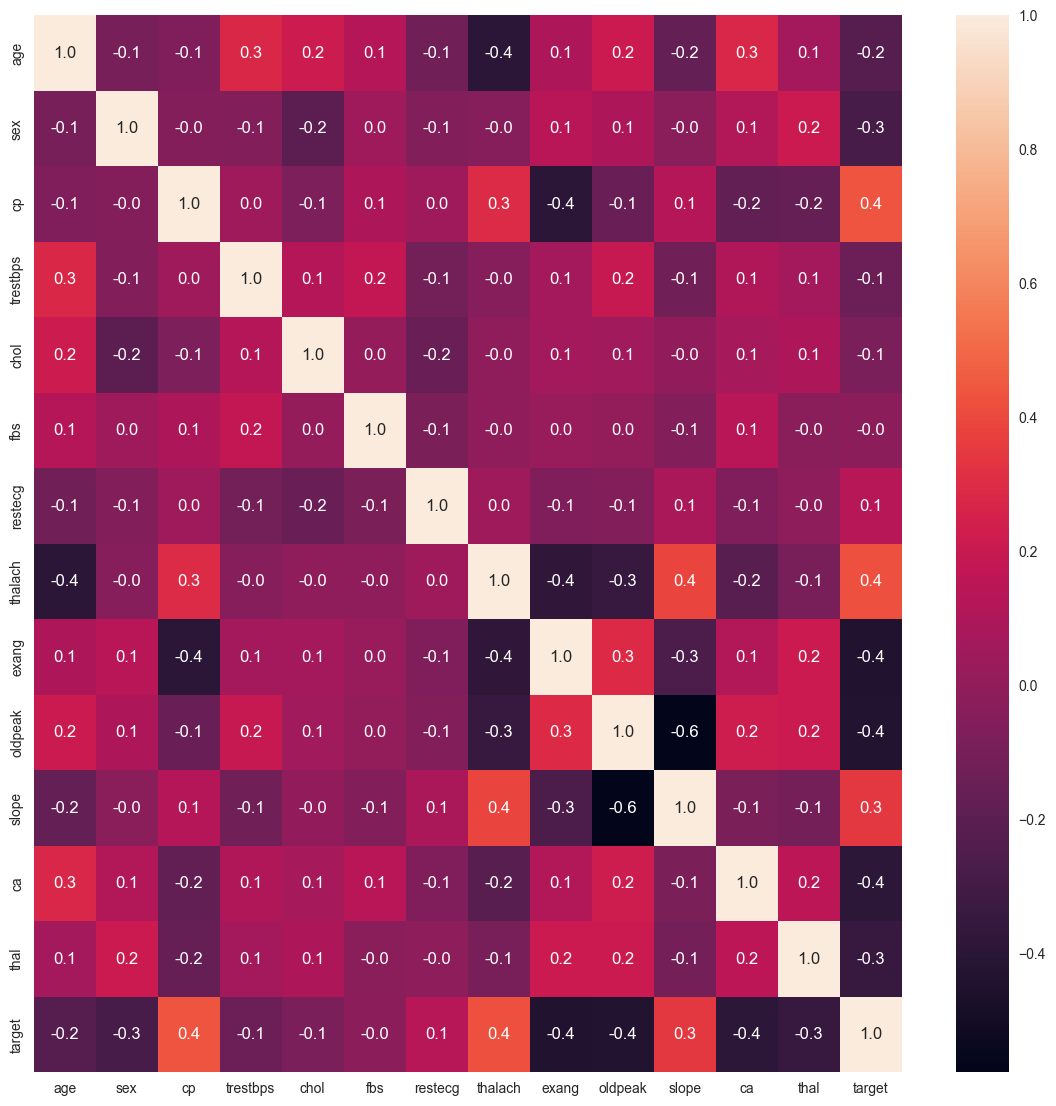

In [3]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

From this correlation matrix, we can understand that all data is unique and not strongly correlated with each other.

It’s also worth noting that some attributes are highly correlated with the target - cp(_chest pain_), thalch, slope

__--__ Secondly, let's look on target balanced plot. An extremely imbalanced dataset can render the whole model training useless and thus, will be of no use

In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

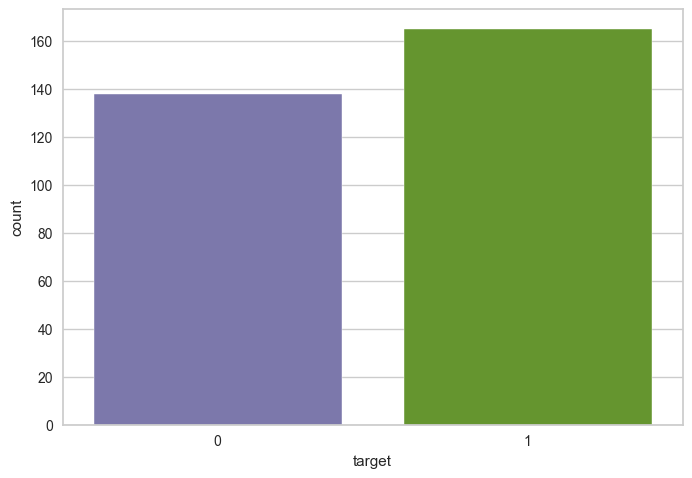

In [5]:
sns.countplot(x="target", data=data)
plt.show()

__--__ Find _missing value_

In [6]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


__--__ The last point of that topic is to look close on data in our dataset. Displayed table describe values that present in data. There are import mean, min and max value of each presented attributes.

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Initial Data Exploration </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will focused on <b>initial data exploration</b> before applying ML models.

<div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Color scheme</div>

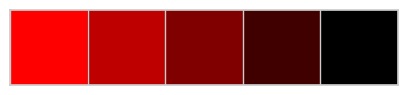

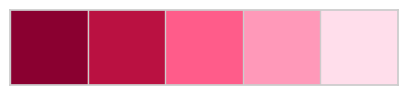

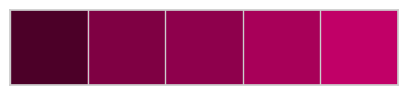

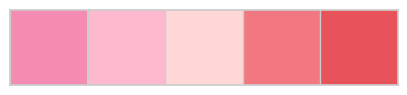

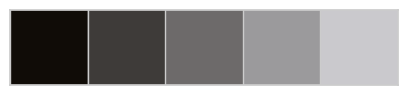

In [9]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

### <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Catogorical Variable </div>

#### <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">  sex (Gender)</div>

*************************
.: Sex (Gender) Total :.
*************************


1    207
0     96
Name: sex, dtype: int64

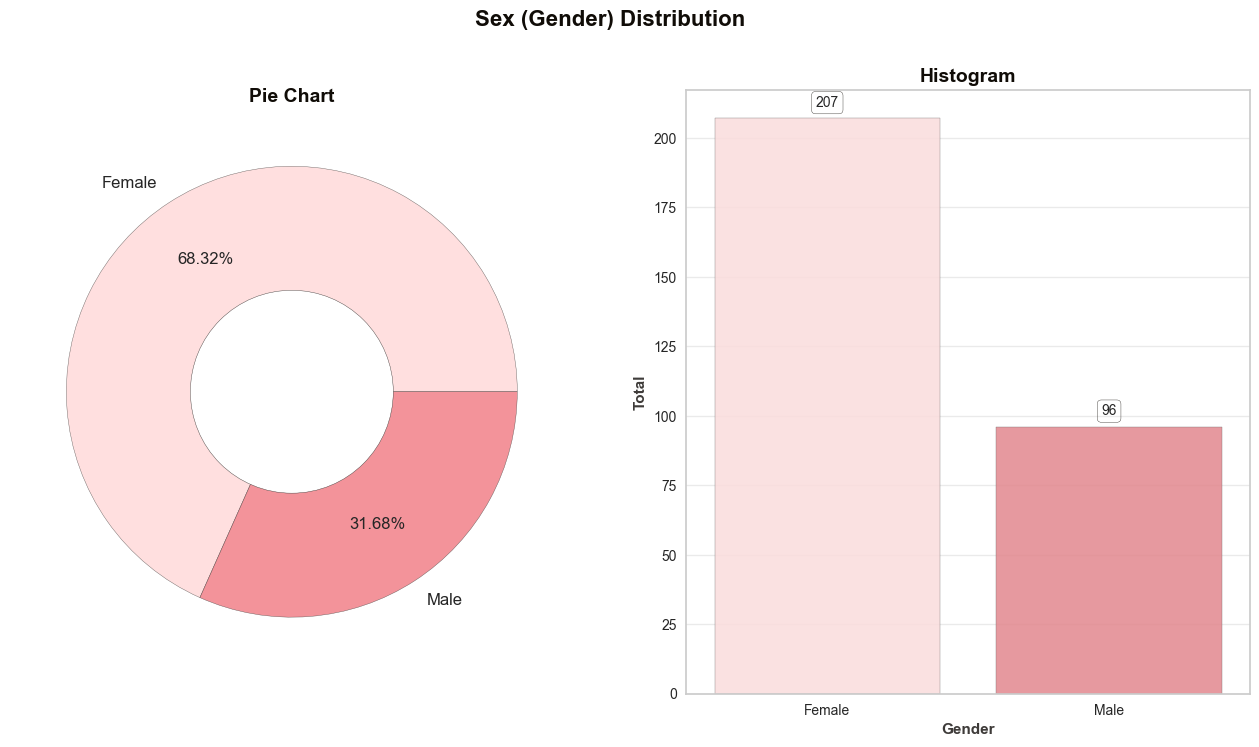

In [10]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Female', 'Male']
order=data['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(data['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='sex', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
data.sex.value_counts(dropna=False)

#### <div style="font-family: Trebuchet MS; background-color:#400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">  cp (Chest Pain Type)</div>

******************************
.: Chest Pain Type Total :.
******************************


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

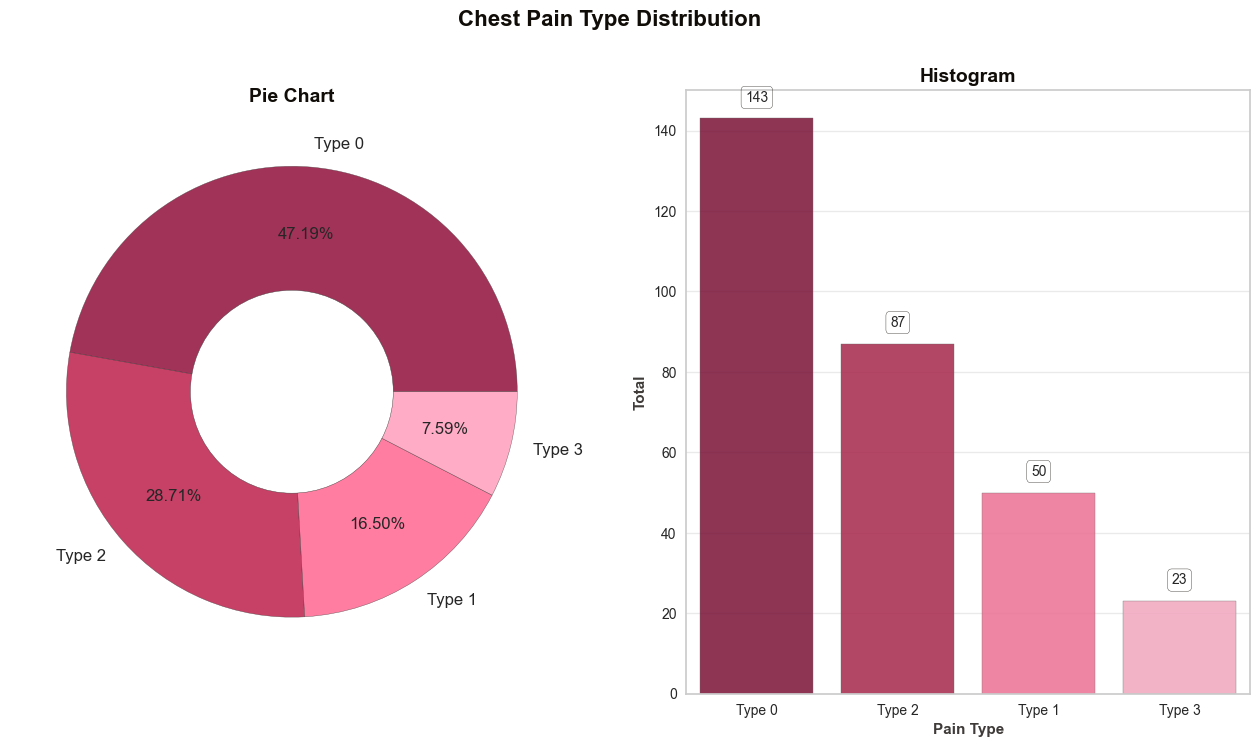

In [11]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:4]
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=data['cp'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(data['cp'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='cp', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
data.cp.value_counts(dropna=False)

#### <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> fbs (Fasting Blood Sugar)</div>

********************************
.: Fasting Blood Sugar Total :.
********************************


0    258
1     45
Name: fbs, dtype: int64

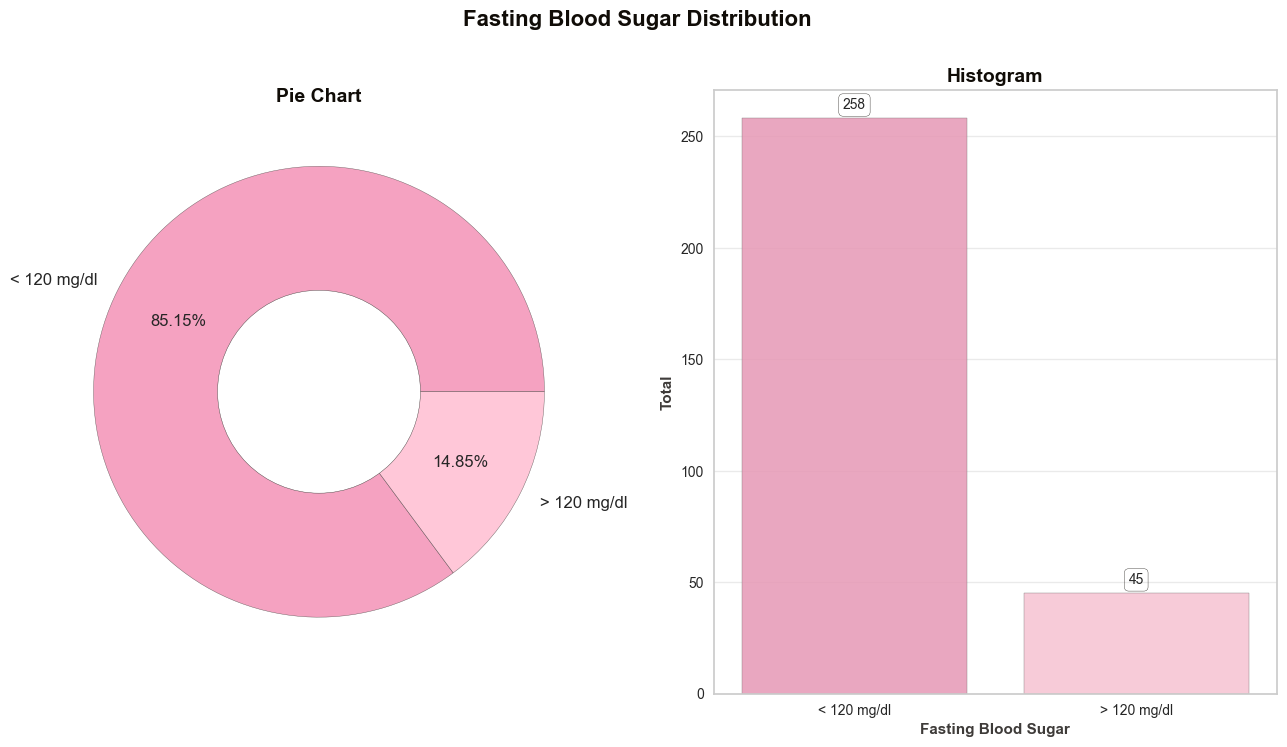

In [12]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[0:2]
labels=['< 120 mg/dl', '> 120 mg/dl']
order=data['fbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(data['fbs'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='fbs', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
data.fbs.value_counts(dropna=False)

#### <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">  restecg (Resting Electrocardiographic Results)</div>

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


1    152
0    147
2      4
Name: restecg, dtype: int64

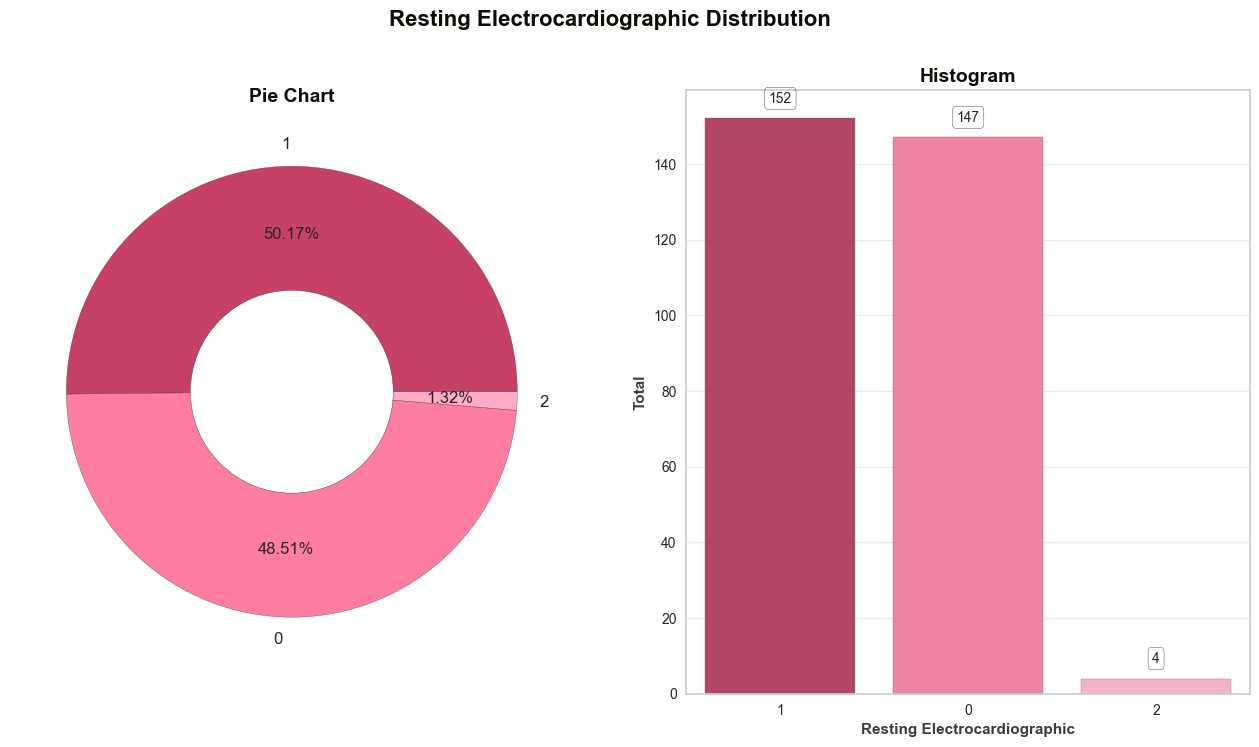

In [13]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['1', '0', '2']
order=data['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(data['restecg'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='restecg', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
data.restecg.value_counts(dropna=False)

#### <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">  exang (Exercise Induced Angina)</div>

***********************************
.: Exercise Induced Angina Total :.
***********************************


0    204
1     99
Name: exang, dtype: int64

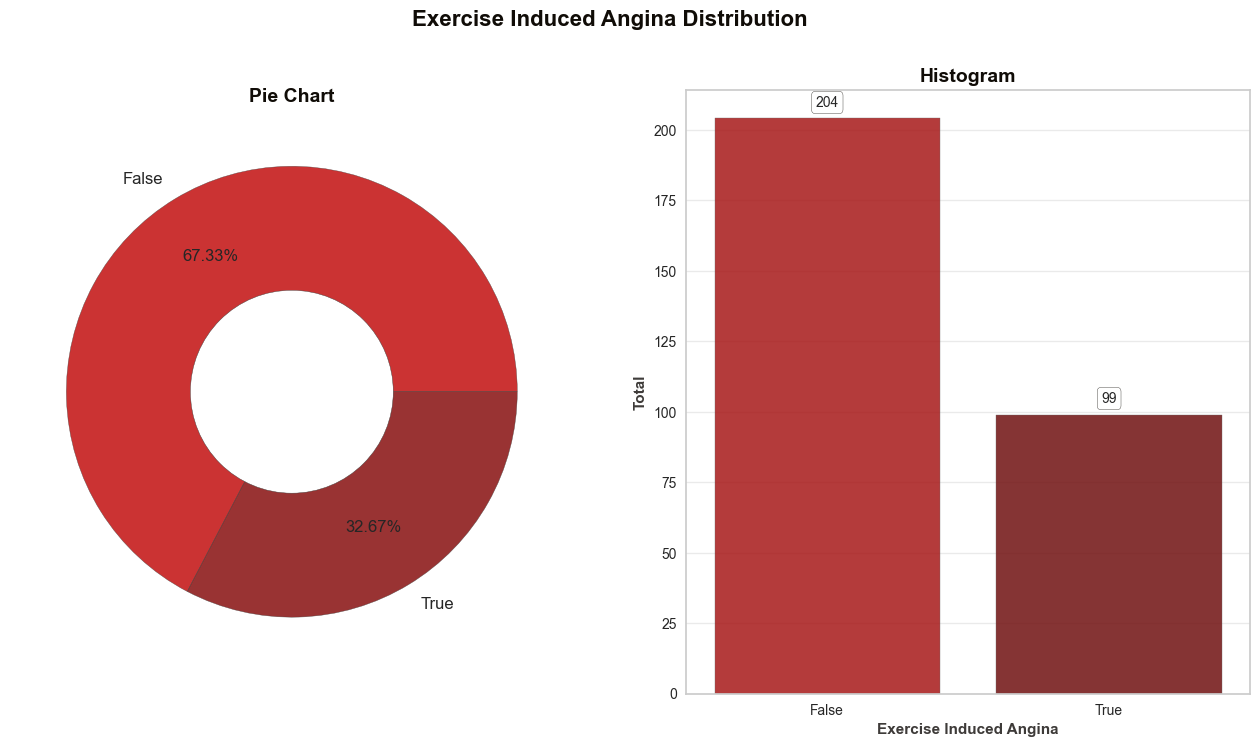

In [14]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[1:3]
labels=['False', 'True']
order=data['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(data['exang'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='exang', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
data.exang.value_counts(dropna=False)

#### <div style="font-family: Trebuchet MS; background-color:#400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">  slope (Slope of the Peak Exercise)</div>

********************
.: Slope Total :.
********************


2    142
1    140
0     21
Name: slope, dtype: int64

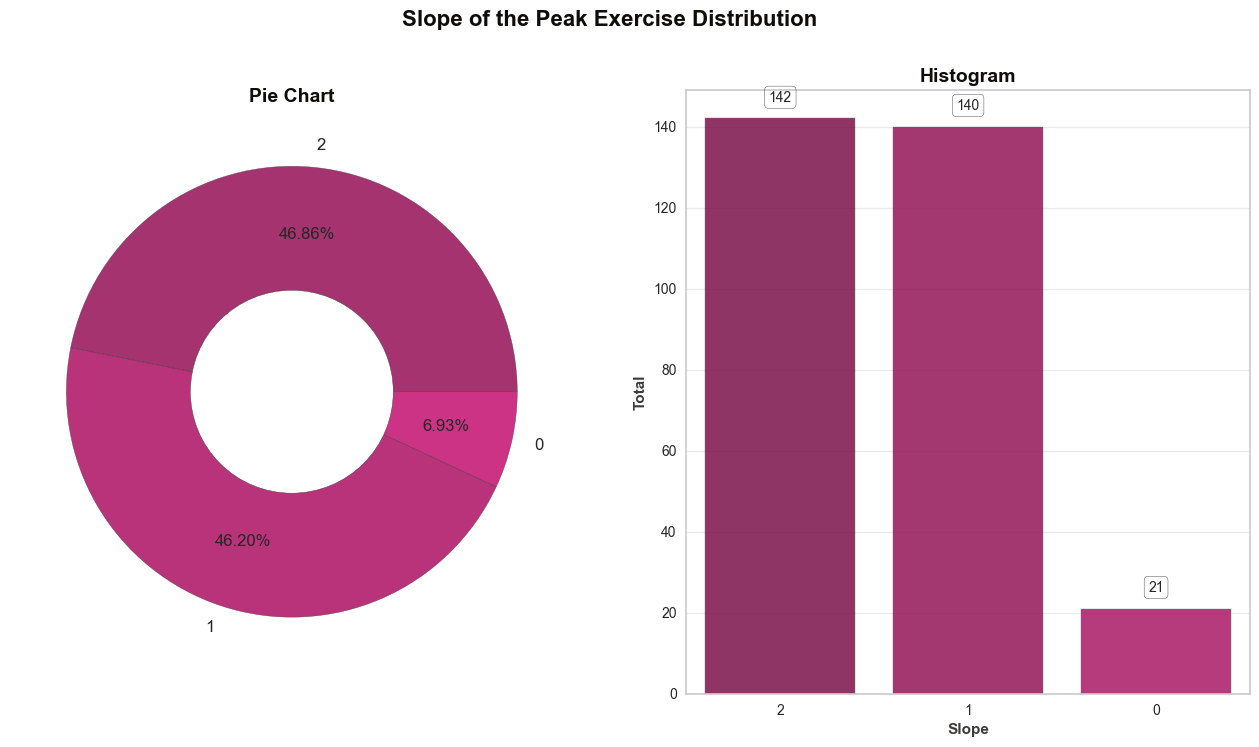

In [15]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad[2:5]
labels=['2', '1', '0']
order=data['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(data['slope'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='slope', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
data.slope.value_counts(dropna=False)

#### <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">  ca (Number of Major Vessels)</div>

****************************************
.: Number of Major Vessels Total :.
****************************************


0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

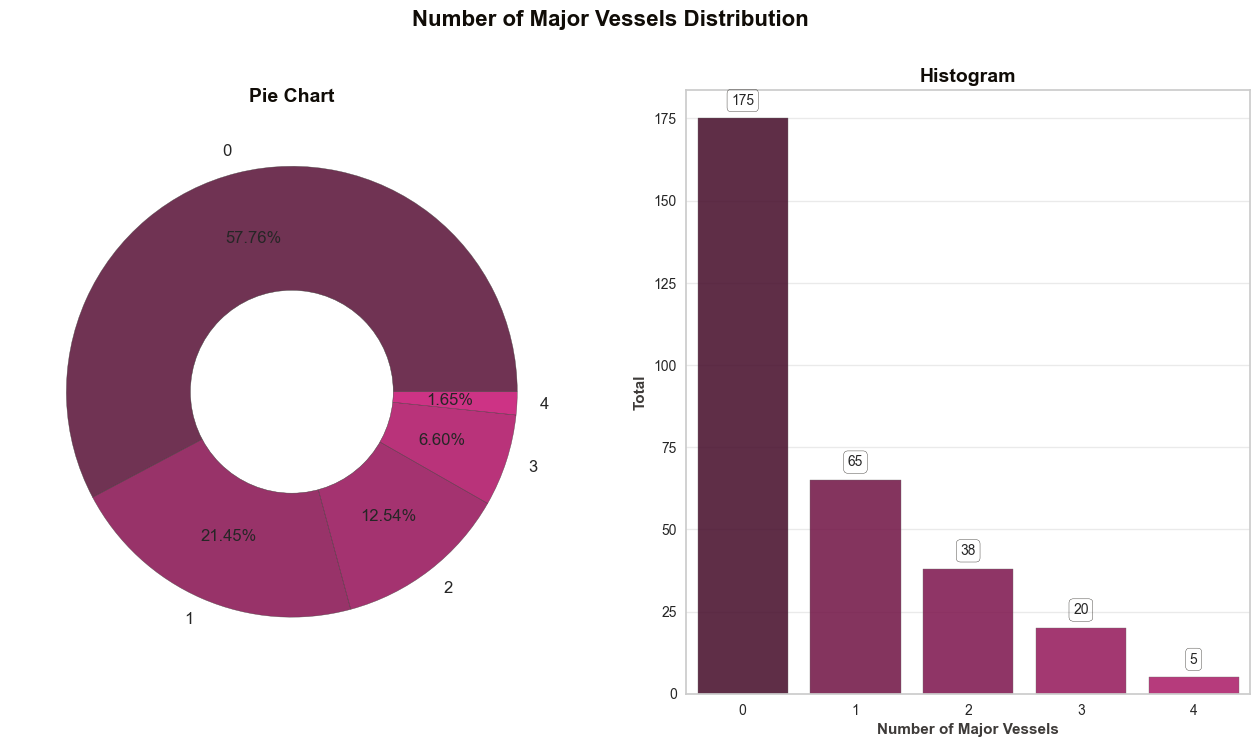

In [16]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=['0', '1', '2', '3', '4']
order=data['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(data['ca'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='ca', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
data.ca.value_counts(dropna=False)

#### <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> thal</div>

********************
.: "thal" Total :.
********************


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

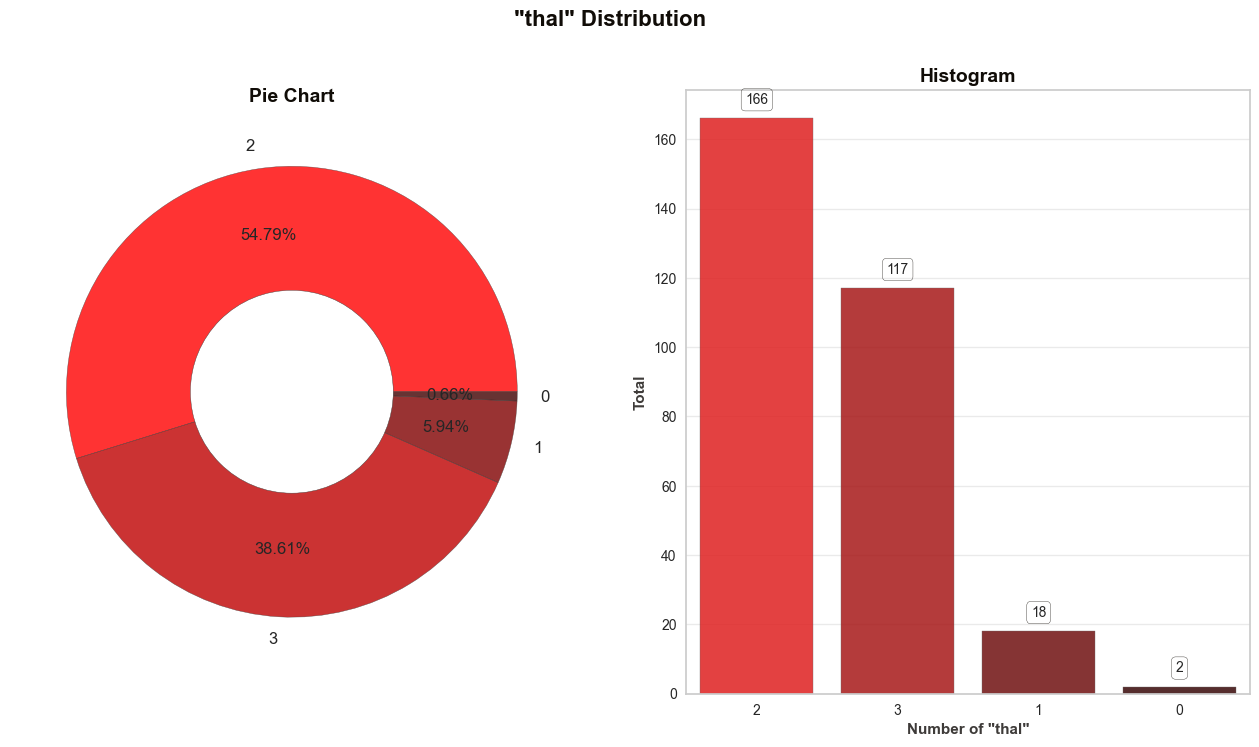

In [17]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[0:4]
labels=['2', '3', '1', '0']
order=data['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(data['thal'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='thal', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
data.thal.value_counts(dropna=False)

#### <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> target (Heart Diseases Status)</div>

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


1    165
0    138
Name: target, dtype: int64

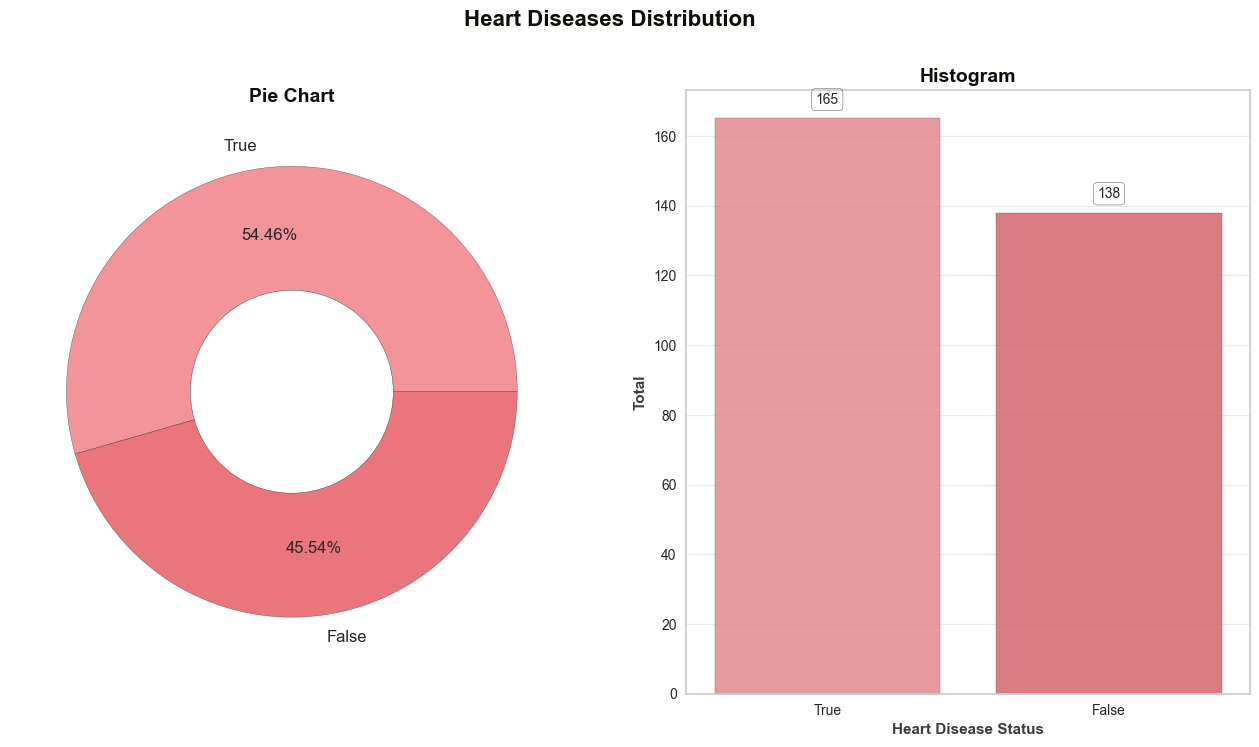

In [18]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[3:5]
labels=['True', 'False']
order=data['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(data['target'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='target', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
data.target.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Numerical Variable 🔢</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The second variable that will be explored is <b>numerical variable</b>.
</div>

#### <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Age</div>

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.202
Kurtosis: -0.542




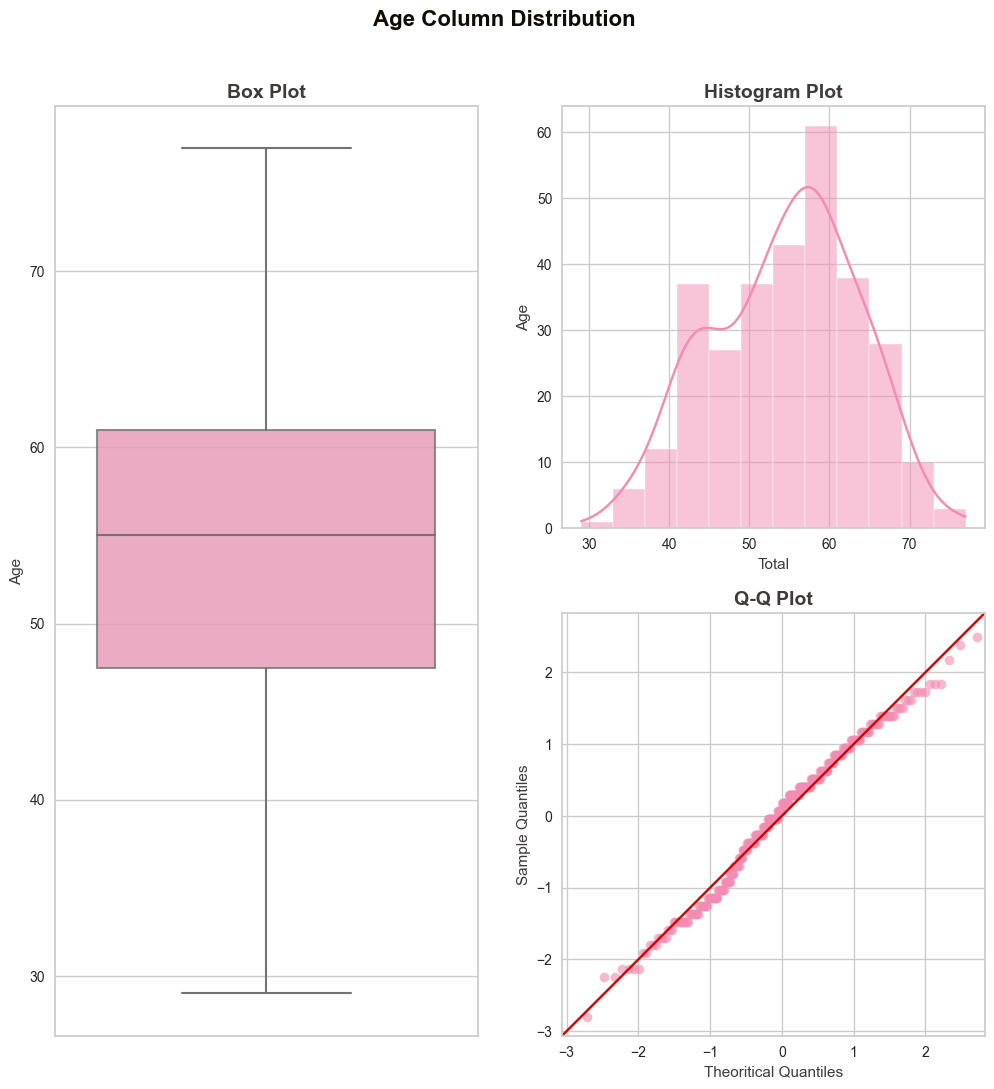

In [19]:
# --- Variable, Color & Plot Size ---
var = 'age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">  trestbps (Resting Blood Pressure in mm Hg) </h4>

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.714
Kurtosis: 0.929




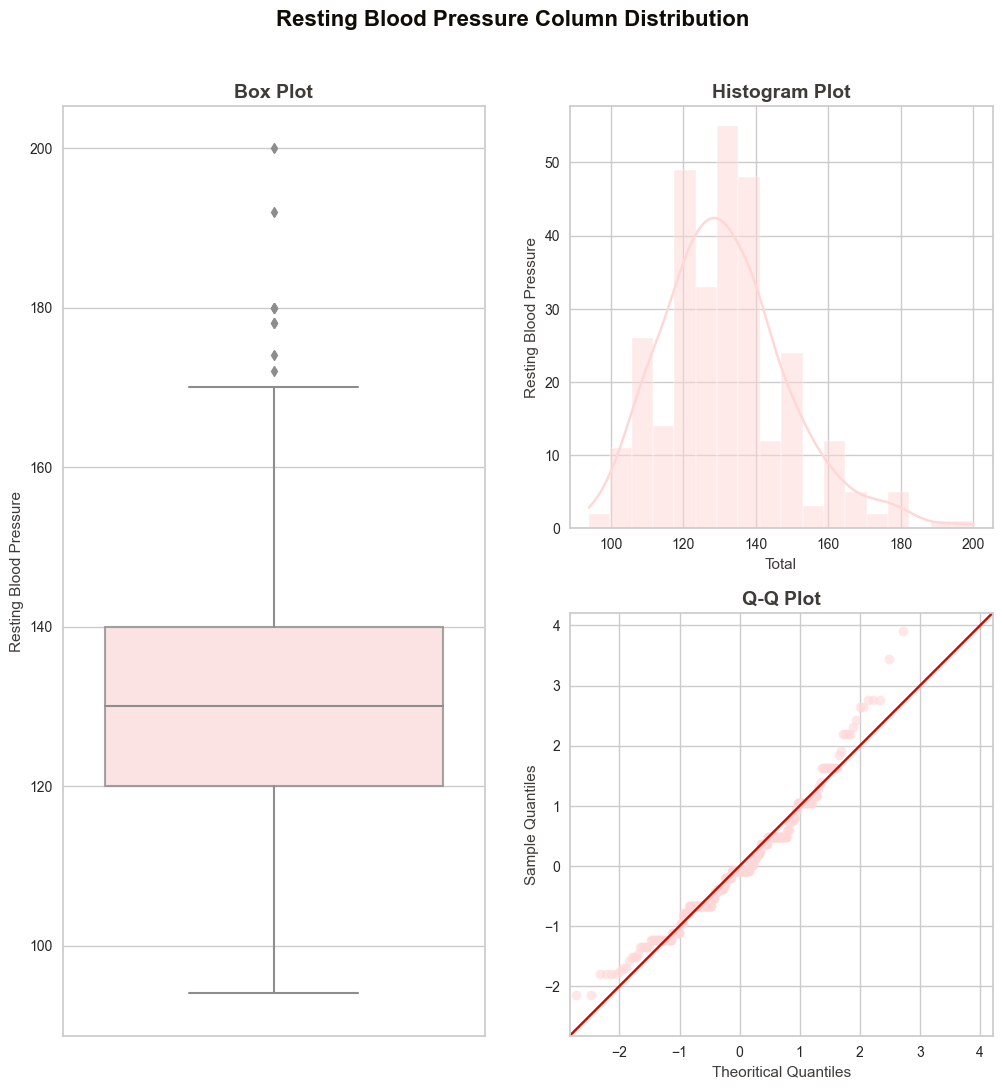

In [20]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
color = color_mix[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">  chol (Serum Cholestoral in mg/dl) </h4>

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.143
Kurtosis: 4.505




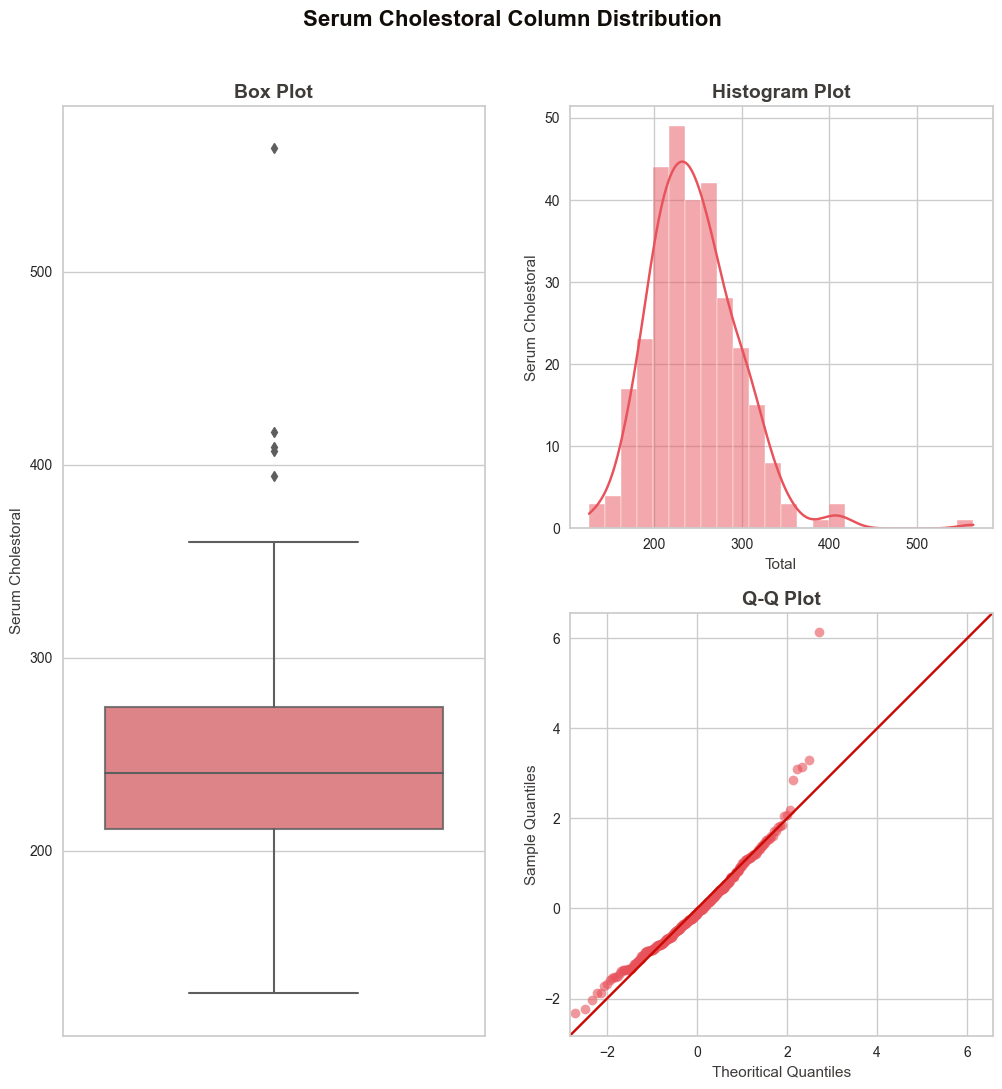

In [21]:
# --- Variable, Color & Plot Size ---
var = 'chol'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">  thalach (Maximum Heart Rate) </h4>

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.537
Kurtosis: -0.062




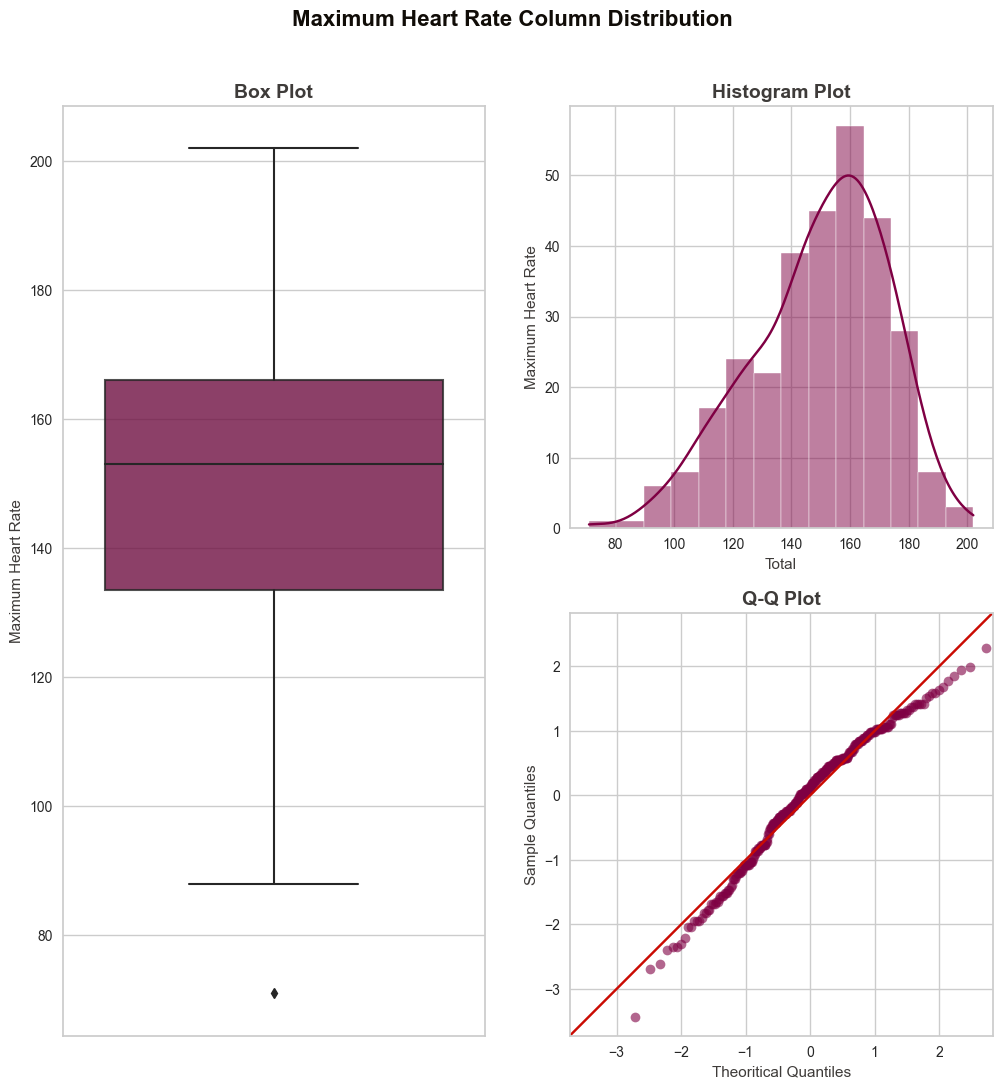

In [22]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
color = purple_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> oldpeak </h4>

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.270
Kurtosis: 1.576




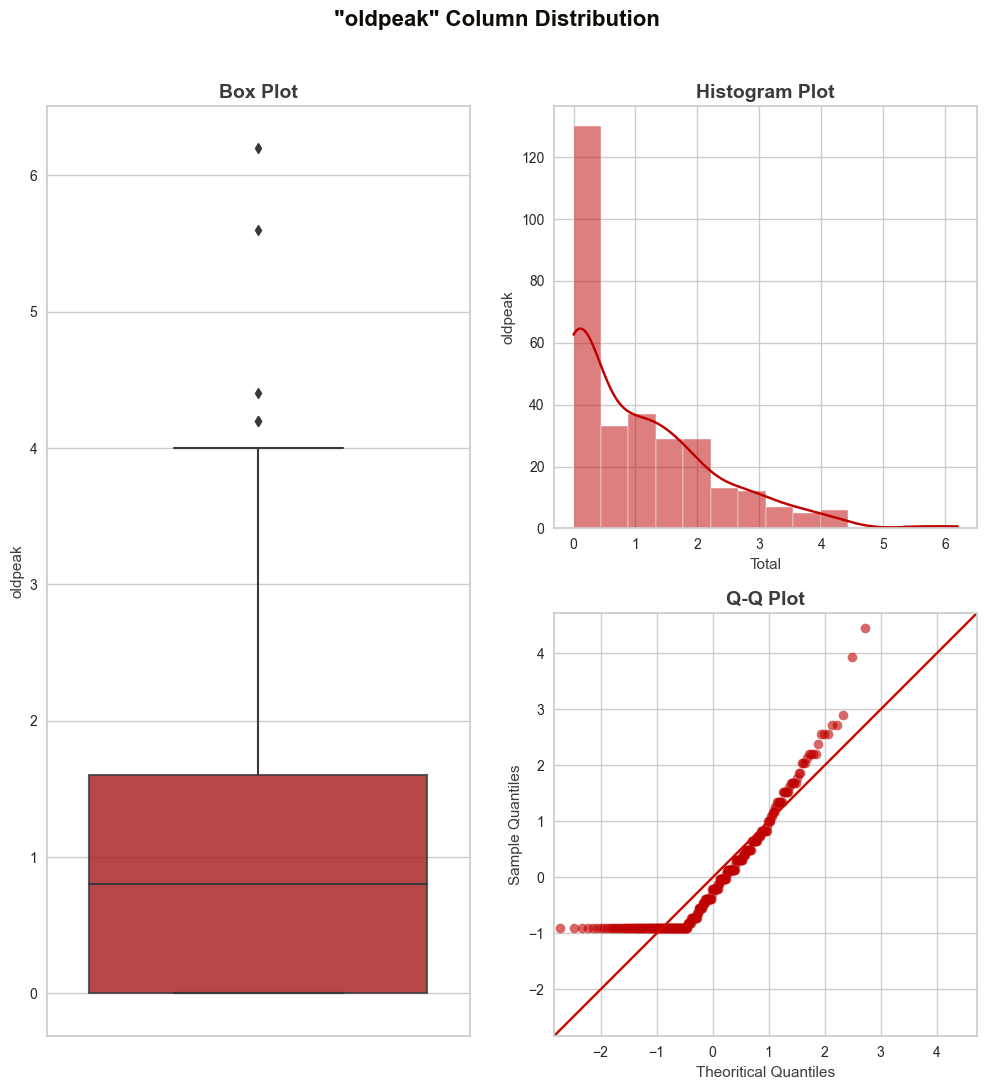

In [23]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'
color = red_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(data[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(data[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=data, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(data[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=data, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

# <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 4. Exploratory Data Analysis 📉</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will perform some <b>EDA</b> to get more insights about dataset.

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Distribution based on Gender </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on gender.
</div>

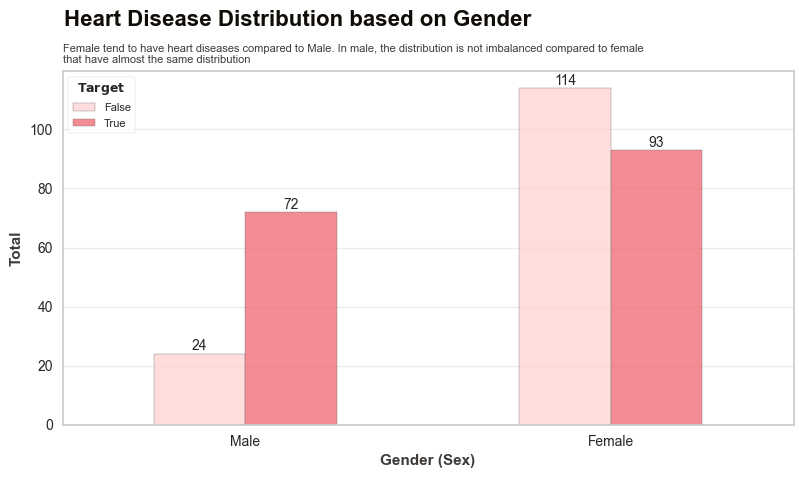

In [24]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(8, 5), 
                                         color=color_mix[2:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Heart Disease Distribution based on Major Vessels Total (Ca Attribute) </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on number of major vessels.
</div>

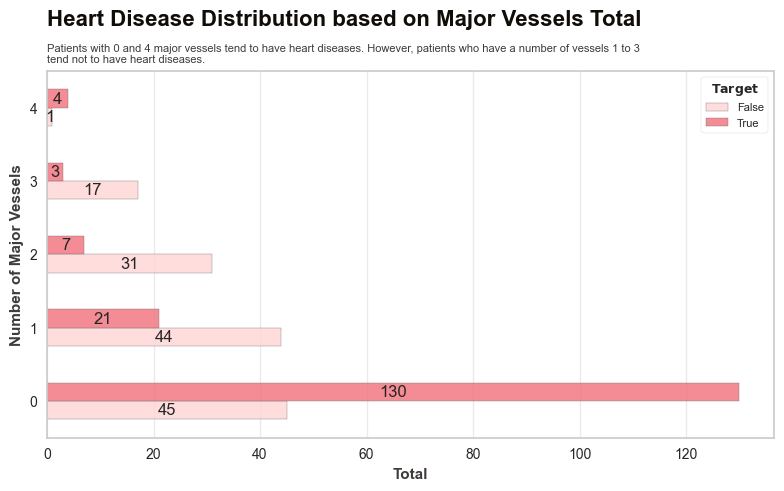

In [26]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(data.ca, data.target).plot(kind='barh', figsize=(8, 5), 
                                         color=color_mix[2:4],
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Scatter Plot based on Age </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show <b>scatter plot</b> of patients with heart diseases based on age.
</div>

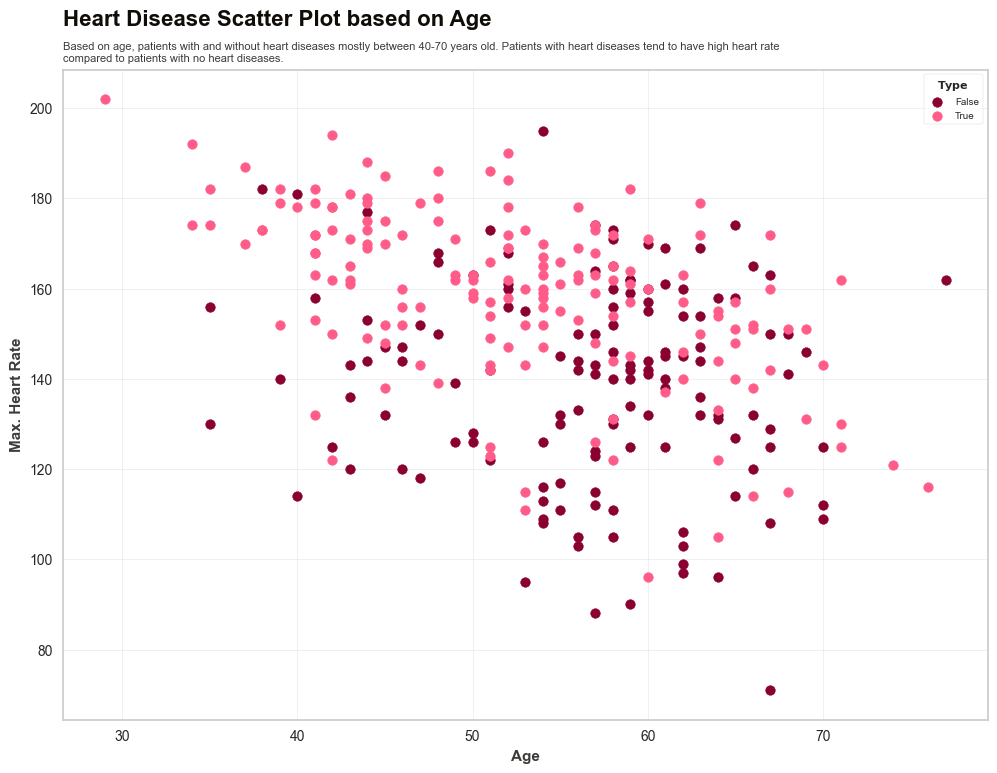

In [27]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Based on age, patients with and without heart diseases mostly between 40-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c=pink_grad[0])
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c=pink_grad[2])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif', color=black_grad[1])
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

# <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> 5.Dataset Pre-processing </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will <b>prepare the dataset</b> before building the machine learning models.
</div>

## <div style="font-family: Trebuchet MS; background-color:#400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Creating Dummy Variables</div>


In [28]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [29]:
data.shape

(303, 31)

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Fit data to Standard Scaler </div>


In [30]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [31]:
data.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
6,0.180175,0.478391,0.922521,0.146634,0.224643,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,1,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,1,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
9,0.290464,1.049520,-1.512490,1.064975,0.483451,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">Features Separating </div>


In [32]:
x = data.drop(['target'], axis=1)
y = data['target']

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Splitting the Dataset </div>


In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">6. Model Implementation</div>


## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Logistic Regression</div>


In [39]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
predicted_lr = lr.predict(x_test)

In [47]:
print("Training accuracy: {}".format(lr.score(x_train, y_train)))
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_lr)))
LR_conf_matrix = confusion_matrix(y_test, predicted_lr)
LRAcc = accuracy_score(y_test, predicted_lr)
print("confussion matrix")
print(LR_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:", LRAcc*100, '\n')
print(classification_report(y_test, predicted_lr))


Training accuracy: 0.8760330578512396
Testing accuracy:  0.8852459016393442
confussion matrix
[[26  3]
 [ 4 28]]


Accuracy of Logistic Regression: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 Logistic Regression: 88.52% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> K-Nearest Neighbour (KNN)</div>


In [36]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append([knn_classifier.score(x_test, y_test), k])
knn_scores

[[0.8032786885245902, 1],
 [0.819672131147541, 2],
 [0.8688524590163934, 3],
 [0.8524590163934426, 4],
 [0.9016393442622951, 5],
 [0.8852459016393442, 6],
 [0.9016393442622951, 7],
 [0.9180327868852459, 8],
 [0.8852459016393442, 9],
 [0.8852459016393442, 10],
 [0.8852459016393442, 11],
 [0.9016393442622951, 12],
 [0.9016393442622951, 13],
 [0.9016393442622951, 14],
 [0.9016393442622951, 15],
 [0.9016393442622951, 16],
 [0.9016393442622951, 17],
 [0.8852459016393442, 18],
 [0.9016393442622951, 19],
 [0.8852459016393442, 20]]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

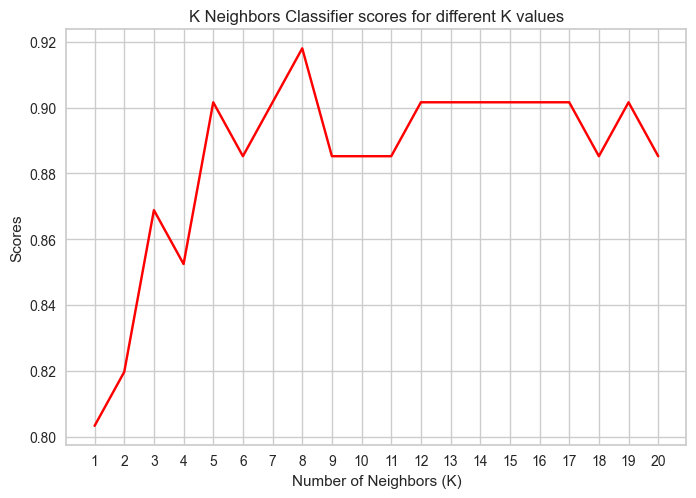

In [37]:
x_axes = [k for k in range(1, 21)]
y_axes = [i[0] for i in knn_scores]
plt.plot(x_axes,y_axes, color = 'red')
    
plt.xticks([i for i in range(1, 21)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

plt.title('K Neighbors Classifier scores for different K values')

In [38]:
print("The best score:", max(knn_scores))

The best score: [0.9180327868852459, 8]


In [44]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train, y_train)
predicted_knn = knn.predict(x_test)


In [48]:
print("Training accuracy: {}".format(knn.score(x_train, y_train)))
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_knn)))
LR_conf_matrix = confusion_matrix(y_test, predicted_knn)
KNNAcc = accuracy_score(y_test, predicted_knn)
print("confussion matrix")
print(LR_conf_matrix)
print("\n")
print("Accuracy of KNN:", KNNAcc*100, '\n')
print(classification_report(y_test, predicted_knn))

Training accuracy: 0.859504132231405
Testing accuracy:  0.9180327868852459
confussion matrix
[[27  2]
 [ 3 29]]


Accuracy of KNN: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 KNearest Neighbors 91.80% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Support Vector Machine (SVM)</div>

In [46]:
SVM_with_Kernel_score= []
for i in (100000,10000,1000,100,10,1,0.5,0.7,0.1,0.01,0.001):
    for kernel in ('linear','sigmoid', 'poly', 'rbf'):
        m7 = 'Support Vector Classifier'
        svc =  SVC(kernel=kernel, C=i, gamma=4, coef0 = 0)
        svc.fit(x_train, y_train)
        SVM_with_Kernel_score.append([svc.score(x_test, y_test), kernel, i])
SVM_with_Kernel_score

[[0.8524590163934426, 'linear', 100000],
 [0.7377049180327869, 'sigmoid', 100000],
 [0.7540983606557377, 'poly', 100000],
 [0.5245901639344263, 'rbf', 100000],
 [0.8524590163934426, 'linear', 10000],
 [0.7377049180327869, 'sigmoid', 10000],
 [0.7540983606557377, 'poly', 10000],
 [0.5245901639344263, 'rbf', 10000],
 [0.8524590163934426, 'linear', 1000],
 [0.7377049180327869, 'sigmoid', 1000],
 [0.7540983606557377, 'poly', 1000],
 [0.5245901639344263, 'rbf', 1000],
 [0.8360655737704918, 'linear', 100],
 [0.7377049180327869, 'sigmoid', 100],
 [0.7540983606557377, 'poly', 100],
 [0.5245901639344263, 'rbf', 100],
 [0.8360655737704918, 'linear', 10],
 [0.7377049180327869, 'sigmoid', 10],
 [0.7540983606557377, 'poly', 10],
 [0.5245901639344263, 'rbf', 10],
 [0.8688524590163934, 'linear', 1],
 [0.7213114754098361, 'sigmoid', 1],
 [0.7540983606557377, 'poly', 1],
 [0.5245901639344263, 'rbf', 1],
 [0.8852459016393442, 'linear', 0.5],
 [0.7704918032786885, 'sigmoid', 0.5],
 [0.7540983606557377, '

In [49]:
print("The best score:", max(SVM_with_Kernel_score))

The best score: [0.8852459016393442, 'linear', 0.5]


In [50]:
svc =  SVC(kernel='linear', C=0.5)
svc.fit(x_train, y_train)


SVC(C=0.5, kernel='linear')

In [52]:
svc_predicted = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
SVMAcc = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",SVMAcc*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[26  3]
 [ 4 28]]


Accuracy of Support Vector Classifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 SVM - 88.52% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">Gaussian Naive Bayes</div>


In [53]:
Naive_Bayes_score = []
for var_smoothing in np.linspace(0,2,21):
    nb = GaussianNB(var_smoothing=var_smoothing)
    nb.fit(x_train, y_train)
    Naive_Bayes_score.append([nb.score(x_test, y_test), var_smoothing])
Naive_Bayes_score

[[0.47540983606557374, 0.0],
 [0.8852459016393442, 0.1],
 [0.9016393442622951, 0.2],
 [0.9016393442622951, 0.30000000000000004],
 [0.9016393442622951, 0.4],
 [0.8852459016393442, 0.5],
 [0.8688524590163934, 0.6000000000000001],
 [0.8524590163934426, 0.7000000000000001],
 [0.8524590163934426, 0.8],
 [0.8524590163934426, 0.9],
 [0.8524590163934426, 1.0],
 [0.8524590163934426, 1.1],
 [0.8524590163934426, 1.2000000000000002],
 [0.8524590163934426, 1.3],
 [0.8360655737704918, 1.4000000000000001],
 [0.8360655737704918, 1.5],
 [0.8360655737704918, 1.6],
 [0.8524590163934426, 1.7000000000000002],
 [0.8524590163934426, 1.8],
 [0.8524590163934426, 1.9000000000000001],
 [0.8524590163934426, 2.0]]

In [56]:
## Look at the result above, we can see the max accuracy when var_smoothing=0.2
nb = GaussianNB(var_smoothing=0.2)
nb.fit(x_train,y_train)

GaussianNB(var_smoothing=0.2)

In [61]:

nb_pred = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
GNBAcc = accuracy_score(y_test, nb_pred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Gaussian Naive Bayes:",GNBAcc*100,'\n')
print(classification_report(y_test,nb_pred))

confussion matrix
[[27  2]
 [ 4 28]]


Accuracy of Gaussian Naive Bayes: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 
Gaussian Naive Bayes - 90.16% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Decision Tree</div>

In [59]:
dt_scores = []
for i in range(1, len(x.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append([dt_classifier.score(x_test, y_test), i])
dt_scores

[[0.7540983606557377, 1],
 [0.7704918032786885, 2],
 [0.7704918032786885, 3],
 [0.7868852459016393, 4],
 [0.7704918032786885, 5],
 [0.8360655737704918, 6],
 [0.7704918032786885, 7],
 [0.819672131147541, 8],
 [0.7049180327868853, 9],
 [0.7540983606557377, 10],
 [0.7540983606557377, 11],
 [0.7868852459016393, 12],
 [0.819672131147541, 13],
 [0.8524590163934426, 14],
 [0.8524590163934426, 15],
 [0.8032786885245902, 16],
 [0.8524590163934426, 17],
 [0.7540983606557377, 18],
 [0.819672131147541, 19],
 [0.8360655737704918, 20],
 [0.7213114754098361, 21],
 [0.8032786885245902, 22],
 [0.7868852459016393, 23],
 [0.8360655737704918, 24],
 [0.8360655737704918, 25],
 [0.819672131147541, 26],
 [0.8360655737704918, 27],
 [0.7868852459016393, 28],
 [0.7868852459016393, 29],
 [0.819672131147541, 30]]

In [60]:
dt = DecisionTreeClassifier(max_features = 14, random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_features=14, random_state=42)

In [64]:
print("Training accuracy: {}".format(dt.score(x_train, y_train)))
predicted_dt = dt.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_dt)))

predicted_dt = dt.predict(x_test)
dt_conf_matrix = confusion_matrix(y_test, predicted_dt)
DTAcc = accuracy_score(y_test, predicted_dt)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree:",DTAcc*100,'\n')
print(classification_report(y_test,predicted_dt))

Training accuracy: 1.0
Testing accuracy:  0.8524590163934426
confussion matrix
[[25  4]
 [ 5 27]]


Accuracy of Decision Tree: 85.24590163934425 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Decision Tree- 85.24% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;">Random Forest</div>

In [65]:
RandomForest_scores = []

##'Random Forest Classfier'
for n in range(10, 100, 5):
    rf = RandomForestClassifier(n_estimators=n, random_state=2,max_depth=5)
    rf.fit(x_train,y_train)
    RandomForest_scores.append([rf.score(x_test, y_test), n])
RandomForest_scores

[[0.8688524590163934, 10],
 [0.8688524590163934, 15],
 [0.8524590163934426, 20],
 [0.8852459016393442, 25],
 [0.8852459016393442, 30],
 [0.8852459016393442, 35],
 [0.8852459016393442, 40],
 [0.8688524590163934, 45],
 [0.8852459016393442, 50],
 [0.8852459016393442, 55],
 [0.8852459016393442, 60],
 [0.8688524590163934, 65],
 [0.8688524590163934, 70],
 [0.8688524590163934, 75],
 [0.8524590163934426, 80],
 [0.8524590163934426, 85],
 [0.8524590163934426, 90],
 [0.8524590163934426, 95]]

In [66]:
## best n_estimators above is 25, so:
RandomForest_scores1=[]
for depth in range(2,8,1):
    rf = RandomForestClassifier(n_estimators=25, random_state=2,max_depth=depth)
    rf.fit(x_train,y_train)
    RandomForest_scores1.append([rf.score(x_test, y_test), depth])
RandomForest_scores1   
    

[[0.8852459016393442, 2],
 [0.8852459016393442, 3],
 [0.9016393442622951, 4],
 [0.8852459016393442, 5],
 [0.8688524590163934, 6],
 [0.8524590163934426, 7]]

In [67]:
print("The best score:", max(RandomForest_scores1))

The best score: [0.9016393442622951, 4]


In [69]:
rf = RandomForestClassifier(n_estimators=25, random_state=2, max_depth=4)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=25, random_state=2)

In [70]:
rf_predicted = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
RFAcc = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:", RFAcc*100, '\n')
print(classification_report(y_test, rf_predicted))

confussion matrix
[[26  3]
 [ 3 29]]


Accuracy of Random Forest: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 Random Forest 90.16% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Extreme Gradient Boosting</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="color: #000000;">
    <mark><b>Boosting</b></mark> is a method of <b>converting weak learners into strong learners</b>. In boosting, <b>each new tree is a fit on a modified version</b> of the original data set. It strongly relies on the prediction that the next model will reduce prediction errors when blended with previous ones. The main idea is <b>to establish target outcomes for this upcoming model to minimize errors</b>.<br><br>
    <mark><b>Gradient Boosting</b></mark> trains many models in <b>a gradual, additive and sequential manner</b>. The term gradient boosting emerged because every case’s target outcomes are based on the gradient’s error with regards to the predictions. Every model reduces prediction errors by taking a step in the correct direction.<br>
    <mark><b>Extreme Gradient Boosting (XGBoost)</b></mark> is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.
    <center>
    <img src="https://www.researchgate.net/publication/345327934/figure/fig3/AS:1022810793209856@1620868504478/Flow-chart-of-XGBoost.png" alt="GB" width="35%"><br>
    <i>🖼 Boosting Algorithm by Rui Guo et al.</i>
    </center>
    </blockquote>
</div>

We choose the base-line initiate the tree follow the sample code and Try to optimize other parameters of the model:

[0]	validation_0-logloss:0.60586	validation_1-logloss:0.59733
[1]	validation_0-logloss:0.53975	validation_1-logloss:0.53906
[2]	validation_0-logloss:0.48404	validation_1-logloss:0.49653
[3]	validation_0-logloss:0.44742	validation_1-logloss:0.45232
[4]	validation_0-logloss:0.41061	validation_1-logloss:0.42629
[5]	validation_0-logloss:0.39716	validation_1-logloss:0.41104
[6]	validation_0-logloss:0.38492	validation_1-logloss:0.40103
[7]	validation_0-logloss:0.37149	validation_1-logloss:0.39602
[8]	validation_0-logloss:0.35468	validation_1-logloss:0.37827
[9]	validation_0-logloss:0.33876	validation_1-logloss:0.37372
[10]	validation_0-logloss:0.33291	validation_1-logloss:0.36607
[11]	validation_0-logloss:0.31863	validation_1-logloss:0.35901
[12]	validation_0-logloss:0.30662	validation_1-logloss:0.34174
[13]	validation_0-logloss:0.29751	validation_1-logloss:0.33886
[14]	validation_0-logloss:0.28730	validation_1-logloss:0.34204
[15]	validation_0-logloss:0.27467	validation_1-logloss:0.33838
[1

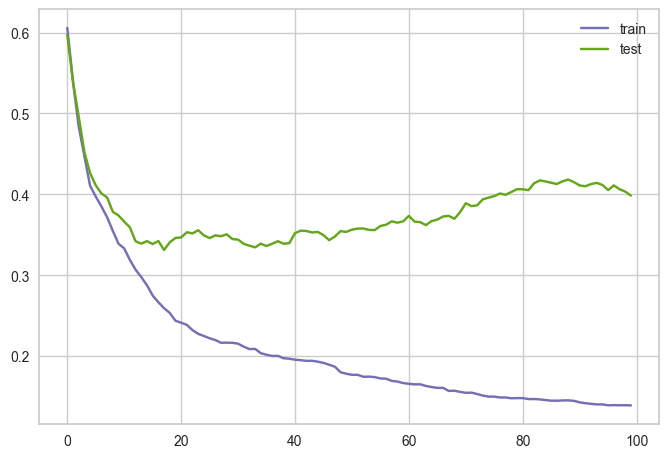

In [71]:
model = XGBClassifier(max_depth=20,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
evalset = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric='logloss', eval_set=evalset) 
# evaluate performance 
yhat = model.predict(x_test) 
score = accuracy_score(y_test, yhat) 
print('Accuracy: %.3f' % score) 
# retrieve performance metrics 
results = model.evals_result() 
# # plot learning curves 
plt.plot(results['validation_0']['logloss'], label='train') 
plt.plot(results['validation_1']['logloss'], label='test') 
# show the legend 
plt.legend() 
# show the plot 
plt.show()

According to the chart above, the segment lower than 20 has rather a steep slope. It is likely that learning rate is too large, so that the model not reach the minimum. 
So we adjust learning rate to 0.01 instead of 0.3 as the default value.

[0]	validation_0-logloss:0.68980	validation_1-logloss:0.68952
[1]	validation_0-logloss:0.68643	validation_1-logloss:0.68629
[2]	validation_0-logloss:0.68348	validation_1-logloss:0.68324
[3]	validation_0-logloss:0.68032	validation_1-logloss:0.67980
[4]	validation_0-logloss:0.67708	validation_1-logloss:0.67762
[5]	validation_0-logloss:0.67484	validation_1-logloss:0.67481
[6]	validation_0-logloss:0.67271	validation_1-logloss:0.67243
[7]	validation_0-logloss:0.67033	validation_1-logloss:0.67049
[8]	validation_0-logloss:0.66819	validation_1-logloss:0.66884
[9]	validation_0-logloss:0.66510	validation_1-logloss:0.66610
[10]	validation_0-logloss:0.66244	validation_1-logloss:0.66319
[11]	validation_0-logloss:0.65902	validation_1-logloss:0.65989
[12]	validation_0-logloss:0.65634	validation_1-logloss:0.65670
[13]	validation_0-logloss:0.65381	validation_1-logloss:0.65449
[14]	validation_0-logloss:0.65061	validation_1-logloss:0.65116
[15]	validation_0-logloss:0.64719	validation_1-logloss:0.64828
[1

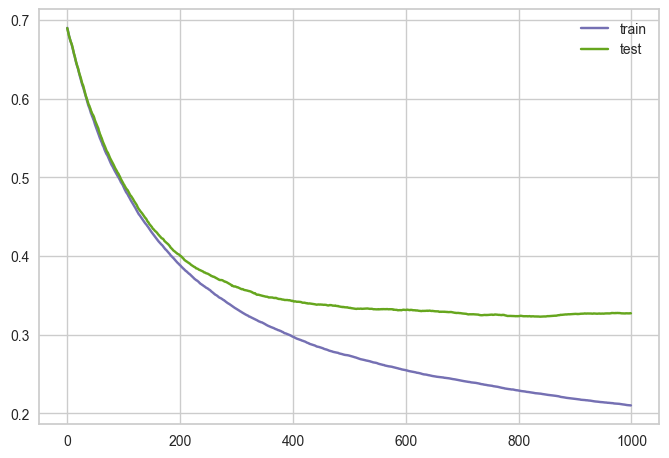

In [72]:
model = XGBClassifier(n_estimators=1000, eta=0.01,max_depth=20,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
evalset = [(x_train, y_train), (x_test, y_test)]
model.fit(x_train, y_train, eval_metric='logloss', eval_set=evalset) 
# evaluate performance 
yhat = model.predict(x_test) 
score = accuracy_score(y_test, yhat) 
print('Accuracy: %.3f' % score) 
# retrieve performance metrics 
results = model.evals_result() 
# # plot learning curves 
plt.plot(results['validation_0']['logloss'], label='train') 
plt.plot(results['validation_1']['logloss'], label='test') 
# show the legend 
plt.legend() 
# show the plot 
plt.show()

We can choose n_estimators=300 follow the chart above and learning_rate=0.01

In [73]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=300, max_depth=20,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.6, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=20, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=27, ...)

In [75]:
xgb_predicted = xgb.predict(x_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
EGBAcc = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boosting:", EGBAcc*100, '\n')
print(classification_report(y_test, xgb_predicted))

confussion matrix
[[26  3]
 [ 3 29]]


Accuracy of Extreme Gradient Boosting: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 Extreme Gradient Boosting - 90.16% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Ensembling</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.
    <blockquote style="color: #000000;">
    Stacking or Stacked Generalization is an ensemble machine learning algorithm. It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms. The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.The stacking ensemble is illustrated in the figure below
    <center>
    <img src="https://mlfromscratch.com/content/images/2020/01/image-2.png" alt="GB" width="35%"><br>
    </center>
    </blockquote>
</div>


In [76]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(x_train,y_train)

StackingCVClassifier(classifiers=[XGBClassifier(base_score=0.5, booster='dart',
                                                callbacks=None,
                                                colsample_bylevel=0.6,
                                                colsample_bynode=0.5,
                                                colsample_bytree=0.6,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=0.6,
                                                gpu_id=-1,
                                                grow_policy='depthwise',
                                                importance_type=None,
                                                interaction_constraints='',
                                                learning_rate...6,
                                                max_cat_threshold=64,
                                                max_cat_to_onehot=4,
                                                max_delta_step=0, max_depth=20,
                                                max_leaves=0,
                                                min_child_weight=1, missing=nan,
                                                monotone_constraints='()',
                                                n_estimators=300, n_jobs=0,
                                                num_parallel_tree=1,
                                                predictor='auto',
                                                random_state=27, ...),
                                  KNeighborsClassifier(n_neighbors=8),
                                  SVC(C=0.5, kernel='linear')],
                     meta_classifier=SVC(C=0.5, kernel='linear'),
                     random_state=42)

In [77]:
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confussion matrix
[[27  2]
 [ 3 29]]


Accuracy of StackingCVClassifier: 91.80327868852459 

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 Stacking Ensemble Model  - 91.80% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> ANN</div>

In [99]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10,activation="relu"))
ann.add(tf.keras.layers.Dense(units=5,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
ann.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
3/3 [==============================] - 3s 6ms/step - loss: 0.7300 - accuracy: 0.4421
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7204 - accuracy: 0.4380
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.7125 - accuracy: 0.4421
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.4380
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4380
Epoch 6/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6919 - accuracy: 0.4711
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5248
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.5331
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 0.6769 - accuracy: 0.5455
Epoch 10/100
3/3 [==============================] - 0s 41ms/step - loss: 0.6720 - accuracy: 0.5702
Epoch 11/100
3/3 [========

In [102]:
ann_predicted = ann.predict(x_test)
ann_predicted=(ann_predicted>0.5)

ann_conf_matrix = confusion_matrix(y_test, ann_predicted)
annACC = accuracy_score(y_test, ann_predicted)
print("confussion matrix")
print(ann_conf_matrix)
print("\n")
print("Accuracy of ANN:", annACC*100, '\n')
print(classification_report(y_test, ann_predicted))

2/2 [==============================] - 0s 4ms/step
confussion matrix
[[27  2]
 [ 4 28]]


Accuracy of ANN: 90.1639344262295 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 ANN - 90.16% acc</b></p>
</div>

## <div style="font-family: Trebuchet MS; background-color: #400000; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Model Comparison </div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After implementing 10 models, this section will <b>compare machine learning models</b>.
</div>

In [103]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['Stacking Ensemble','Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'Extreme Gradient Boosting', 'ANN' 
                                  ], 
                        'Accuracy': [scv_acc_score*100, LRAcc*100, KNNAcc*100, SVMAcc*100, GNBAcc*100, DTAcc*100, RFAcc*100, EGBAcc*100, annACC*100
                                     ]})

# --- Create Accuracy Comparison Table ---
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
Stacking Ensemble,91.803279
K-Nearest Neighbour,91.803279
Gaussian Naive Bayes,90.163934
Random Forest,90.163934
Extreme Gradient Boosting,90.163934
ANN,90.163934
Logistic Regression,88.524590
Support Vector Machine,88.524590
Decision Tree,85.245902


# <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">7. Features importance</div>


In [47]:
#model
model_fi = ExtraTreesClassifier()
model_fi.fit(x,y)
print(model_fi.feature_importances_)

[0.05519666 0.04283605 0.04585022 0.050391   0.05429265 0.0238063
 0.02233927 0.10288931 0.01313939 0.02930381 0.01234638 0.01123748
 0.01043651 0.02200367 0.02189417 0.00104892 0.05190829 0.0358245
 0.00668979 0.03065193 0.0401022  0.09169612 0.02604436 0.01982765
 0.01503034 0.00261172 0.00065971 0.00667475 0.07819882 0.07506805]


In [48]:
pd.Series(model_fi.feature_importances_, index=x.columns)

age          0.055197
trestbps     0.042836
chol         0.045850
thalach      0.050391
oldpeak      0.054293
sex_0        0.023806
sex_1        0.022339
cp_0         0.102889
cp_1         0.013139
cp_2         0.029304
cp_3         0.012346
fbs_0        0.011237
fbs_1        0.010437
restecg_0    0.022004
restecg_1    0.021894
restecg_2    0.001049
exang_0      0.051908
exang_1      0.035824
slope_0      0.006690
slope_1      0.030652
slope_2      0.040102
ca_0         0.091696
ca_1         0.026044
ca_2         0.019828
ca_3         0.015030
ca_4         0.002612
thal_0       0.000660
thal_1       0.006675
thal_2       0.078199
thal_3       0.075068
dtype: float64

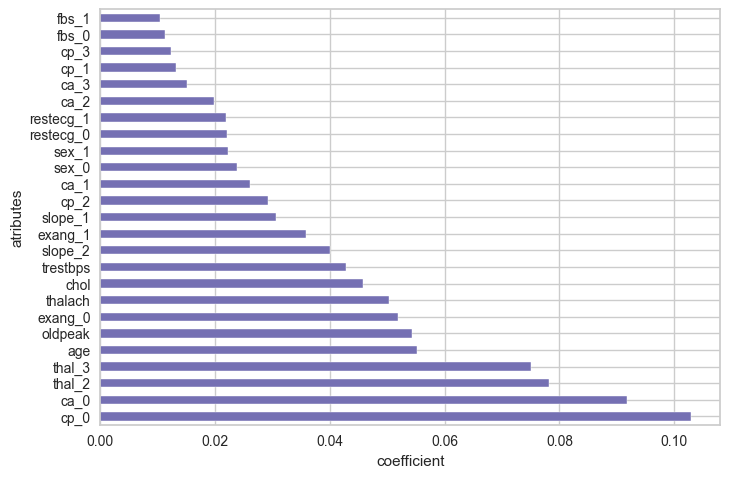

In [49]:
feat_importances = pd.Series(model_fi.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.xlabel('coefficient')
plt.ylabel('atributes')
plt.savefig('feature_importance.png')
plt.show()